# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘AppointmentDay’ tells us on what day the patient he have the appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
‘No-show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
list of some diseases [Hipertension, Diabetes, Alcoholism, Handcap]

### Question(s) for Analysis
Independent
<ol>
<li>What is ratio between the people who attend in the time and the others ??</li>
<li>The most common day that the people booked ??</li>
<li>The most common day that the people have the appointment ??</li>
<li>The retio between the people who have the scholarship or have not ??</li>
<li>The retio between the people who have the hipertension or have not ??</li>
<li>The retio between the people who have the diabetes or have not ??</li>
<li>The retio between the people who have the alcoholism or have not ??</li>
</ol>
Dependent
<ol>
<li>What is ratio between the people who attend in the time and the others depend on gender ??</li>
<li>What is ratio between the people who attend in the time and the others depend on scholarship ??</li>
<li>What is ratio between the people who attend in the time and the others depend on hipertension ??</li>
<li>What is ratio between the people who attend in the time and the others depend on diabetes ??</li>
<li>What is ratio between the people who attend in the time and the others depend on alcoholism ??</li>
<li>What is ratio between the people who over 40 years and under 40 years depend on attendance ??</li>
<li>The most common neighbourhood depend on attendance??</li>
</ol>

In [51]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [52]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Information related the dataset

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Types of data types of the dataset

In [54]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The number of columns and rows

In [55]:
df.shape

(110527, 14)

The average age for this patients's ages 

In [56]:
np.mean(df['Age'])

37.08887421173107


### Data Cleaning
 

The number of dataset duplicates

In [57]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.duplicated().sum()

0

Ckeck the number of values of null

In [21]:
df.notnull().sum()
df.notna().sum()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

### The data is cleaded that has not missed or duplicated values

<a id='eda'></a>
## Exploratory Data Analysis


In [22]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

Adding new column to be clear for attendences

In [59]:
df['Attend'] = 'Yes'
df.loc[df['No-show'] == 'Yes', 'Attend'] = 'No'
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Attend
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Yes


### Research Question 1 (What is ratio between the people who attend in the time and the others!)

Visual to show the rate between the attendaces using pie chart

<AxesSubplot:title={'center':'Visual to show the attendaces'}, ylabel='Attend'>

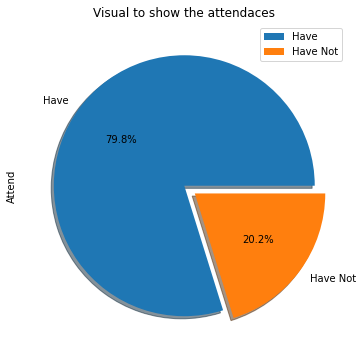

In [60]:
labels = 'Have', 'Have Not'
explode = (0, 0.1)
df['Attend'].value_counts().plot(
      kind ='pie',
      figsize = (6,6),
      title = "Visual to show the attendaces", 
      legend = True,
      autopct = '%1.1f%%',
      shadow = True,
      labels = labels,
      explode = explode
)

Visual to show the rate of the attendaces using box chart

<AxesSubplot:title={'center':'Visual to show the attendaces'}>

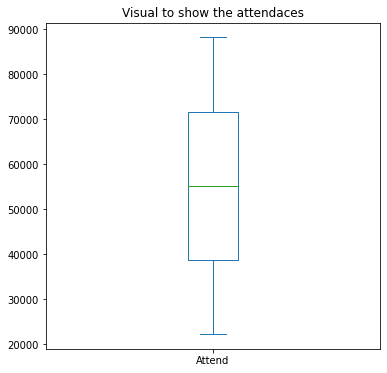

In [62]:
df['Attend'].value_counts().plot(
      kind ='box',
      figsize = (6,6),
      title = "Visual to show the attendaces", 
      legend = True,
)

### Research Question 2 (The retio between the people who have the scholarship or have not ??)

Visual to show the rate of who have the scholarship and who have not

<AxesSubplot:title={'center':'Visual to show the scholarship'}, ylabel='Scholarship'>

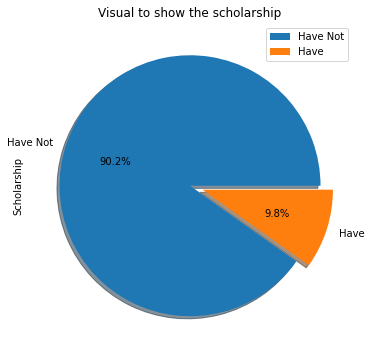

In [64]:
labels = 'Have Not', 'Have'
explode = (0, 0.1)
df['Scholarship'].value_counts().plot(
      kind = 'pie', 
      figsize = (6,6),
      title = "Visual to show the scholarship", 
      legend = True,
      autopct ='%1.1f%%',
      shadow = True,
      labels = labels,
      explode = explode
)


### Research Question 3 (The retio between the people who have the hipertension or have not ??)

Visual to show the rate of who have the Hipertension and who have not 

<AxesSubplot:title={'center':'Visual to show the hipertension'}, ylabel='Hipertension'>

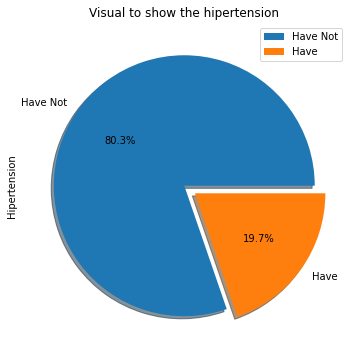

In [34]:
labels = 'Have Not', 'Have'
explode = (0, 0.1)
df['Hipertension'].value_counts().plot(
      kind ='pie',
      figsize = (6,6),
      title = "Visual to show the hipertension", 
      legend = True,
      autopct = '%1.1f%%',
      shadow = True,
      labels = labels,
      explode = explode
)

### Research Question 4 (The retio between the people who have the diabetes or have not ??)

Visual to show the rate of who have the diabetes and who have not

<AxesSubplot:title={'center':'Visual to show the diabetes'}, ylabel='Diabetes'>

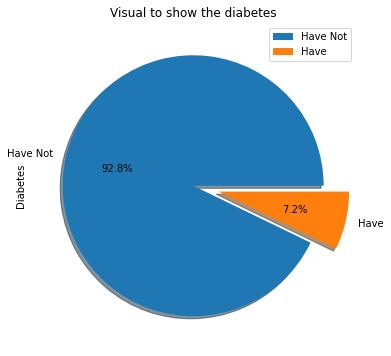

In [45]:
labels = 'Have Not', 'Have'
explode = (0, 0.2)
df['Diabetes'].value_counts().plot(
      kind ='pie',
      figsize = (6,6),
      title = "Visual to show the diabetes", 
      legend = True,
      autopct = '%1.1f%%',
      shadow = True,
      labels = labels,
      explode = explode
)

### Research Question 5 (The retio between the people who have the alcoholism or have not ??)

Visual to show the rate of who have the alcoholism and who have not

<AxesSubplot:title={'center':'Visual to show the alcoholism'}, ylabel='Alcoholism'>

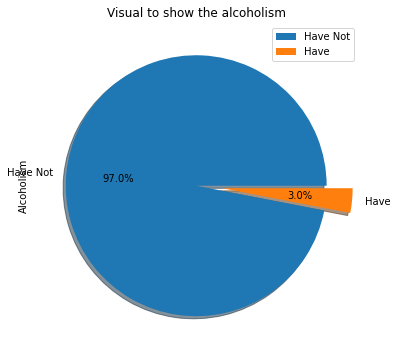

In [46]:
labels = 'Have Not', 'Have'
explode = (0, 0.2)
df['Alcoholism'].value_counts().plot(
      kind ='pie',
      figsize = (6,6),
      title = "Visual to show the alcoholism", 
      legend = True,
      autopct = '%1.1f%%',
      shadow = True,
      labels = labels,
      explode = explode
)

### Research Question 6 (The common day that the people booked the appointment and take it ??)

Convert the ScheduledDay and AppointmentDay to DateTime

In [45]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

The common day that the people booked the appointment 

In [48]:
df['S_Day'] = df['ScheduledDay'].dt.day_name()
common_scheduled_day = df['S_Day'].mode()[0]
common_scheduled_day

'Tuesday'

The common day that the people attend the appointment 

In [47]:
df['A_Day'] = df['AppointmentDay'].dt.day_name()
common_appointment_day = df['A_Day'].mode()[0]
common_appointment_day

'Wednesday'

Visual to show the common_scheduled_day

<AxesSubplot:title={'center':'Visual to show the common_scheduled_day'}>

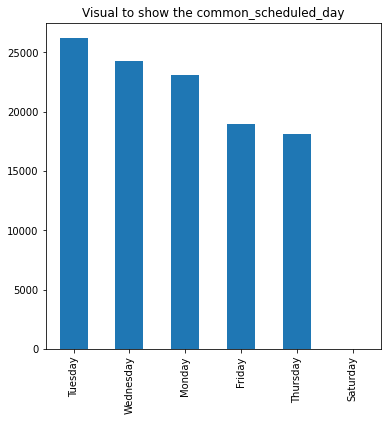

In [50]:
df['S_Day'].value_counts().plot(
      kind='bar',
      figsize = (6,6),
      title = "Visual to show the common_scheduled_day", 
)

Visual to show the common_appointment_day

<AxesSubplot:title={'center':'Visual to show the common_appointment_day'}>

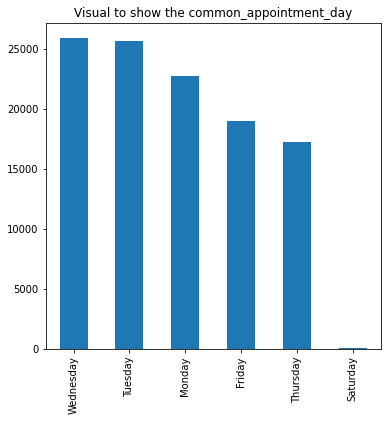

In [49]:
df['A_Day'].value_counts().plot(
      kind ='bar',
      figsize = (6,6),
      title = "Visual to show the common_appointment_day",
)

Delete the two columns S_Day and A_Day

In [50]:
df.drop('S_Day', axis=1, inplace=True)
df.drop('A_Day', axis=1, inplace=True)
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

Chech the updated data frame

In [53]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age Category,Attend
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Over 40,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Over 40,Yes


### Research Question 7 (What is ratio between the people who attend in the time and the others depend on gender ??)

Make a copy of df to male and femal

In [32]:
df_gender_male = df.loc[df['Gender'] == 'M']
df_gender_female = df.loc[df['Gender'] == 'F']

Get the visual of Men who attend the appointment

<AxesSubplot:title={'center':'Visual to show the Men Attendance'}, ylabel='No-show'>

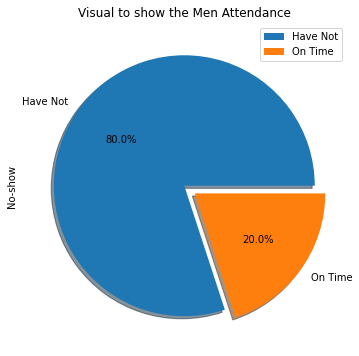

In [107]:
labels =  'Have Not', 'On Time'
explode = (0, 0.1)
df_gender_male['No-show'].value_counts().plot(
      kind ='pie',
      figsize = (6,6),
      title = "Visual to show the Men Attendance", 
      legend = True,
      autopct = '%1.1f%%',
      shadow = True,
      labels = labels,
      explode = explode
)

Get the visual of Women who attend the appointment

<AxesSubplot:title={'center':'Visual to show the Women Attendance'}, ylabel='No-show'>

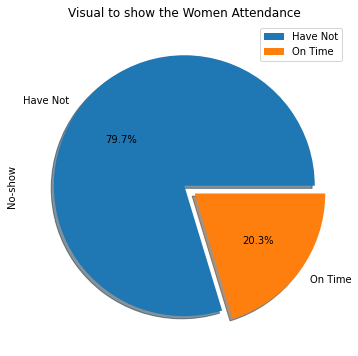

In [34]:
labels =  'Have Not', 'On Time'
explode = (0, 0.1)
df_gender_female['No-show'].value_counts().plot(
      kind ='pie',
      figsize = (6,6),
      title = "Visual to show the Women Attendance", 
      legend = True,
      autopct = '%1.1f%%',
      shadow = True,
      labels = labels,
      explode = explode
)

### Research Question 8 (What is ratio between the people who have the scholarship and who dose not ??)

Make a copy of df to knew who has the scholarship and who dose not

In [36]:
df_scholarship_have = df.loc[df['Scholarship'] == 1]
df_scholarship_not_have = df.loc[df['Scholarship'] == 0]

Get the visual of who have the scholarship

<AxesSubplot:title={'center':'Visual to show the attendance who have the scholarship'}, ylabel='No-show'>

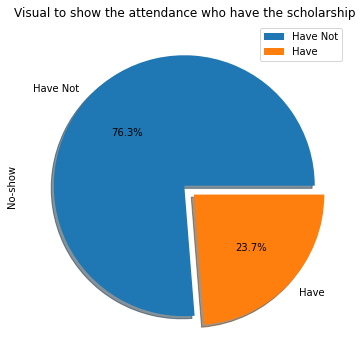

In [42]:
labels =  'Have Not', 'Have'
explode = (0, 0.1)
df_scholarship_have['No-show'].value_counts().plot(
      kind ='pie',
      figsize = (6,6),
      title = "Visual to show the attendance who have the scholarship", 
      legend = True,
      autopct = '%1.1f%%',
      shadow = True,
      labels = labels,
      explode = explode
)

<AxesSubplot:title={'center':'Visual to show the attendance who do not have the scholarship'}, ylabel='No-show'>

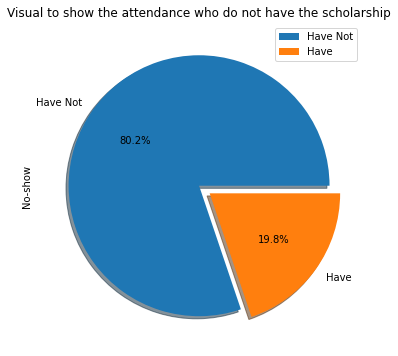

In [90]:
labels =  'Have Not', 'Have'
explode = (0, 0.1)
df_scholarship_not_have['No-show'].value_counts().plot(
      kind ='pie',
      figsize = (6,6),
      title = "Visual to show the attendance who do not have the scholarship", 
      legend = True,
      autopct = '%1.1f%%',
      shadow = True,
      labels = labels,
      explode = explode
)

### Research Question 9 (What is ratio between the people who have over and under 40 ??)

Create new columns and consist of who is over 40 years and who under this age

In [14]:
def new_age_column(df):
    """
    Add new column.

    This function simply just add one column for know that 
    this patient over 40 years old or under 40 years old

    Parameters
    ----------
    df : Data Frame
        The dataset that the function will insert in it.

    Returns
    -------
    Data Frame
        The new dataset with the new column.

    """
    df['Age Category'] = 'Over 40'
    df.loc[df['Age'] < 40, 'Age Category'] = 'Under 40'
new_age_column(df)

Check the new column ---> 'Age Category'

In [12]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Age Category
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Over 40
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Over 40


Visual to show who is over 40 years and who under this age

<AxesSubplot:title={'center':'Visual to show who is over 40 years and who under this age'}, ylabel='Age Category'>

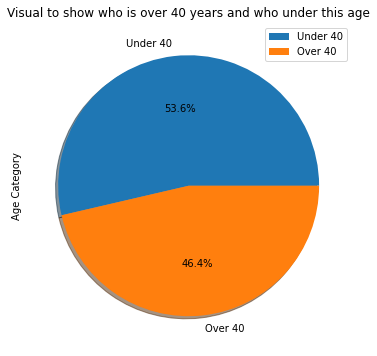

In [92]:
df['Age Category'].value_counts().plot(
      kind ='pie',
      figsize = (6,6),
      title = "Visual to show who is over 40 years and who under this age", 
      legend = True,
      autopct = '%1.1f%%',
      shadow = True,
)

Make a copy of df to over 40 and under 40

In [16]:
df_age_over40 = df.loc[df['Age Category'] == 'Over 40']
df_age_under40 = df.loc[df['Age Category'] == 'Under 40']

Visual to show who is over 40 years

<AxesSubplot:title={'center':'Visual to show who is over 40 years'}, ylabel='No-show'>

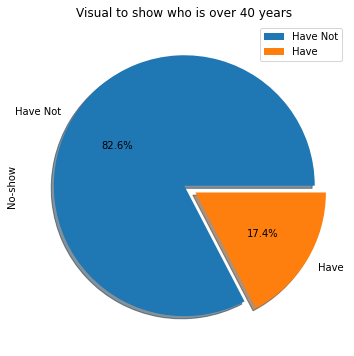

In [24]:
labels =  'Have Not', 'Have'
explode = (0, 0.1)
df_age_over40['No-show'].value_counts().plot(
      kind = 'pie', #pie // bar
      figsize = (6,6),
      title = "Visual to show who is over 40 years", 
      legend = True,
      autopct = '%1.1f%%',
      shadow = True,
      labels = labels,
      explode = explode
)

Visual to show who is under 40 years

<AxesSubplot:title={'center':'Visual to show who is under 40 years'}, ylabel='No-show'>

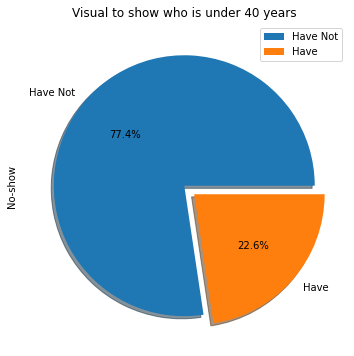

In [19]:
labels =  'Have Not', 'Have'
explode = (0, 0.1)
df_age_under40['No-show'].value_counts().plot(
      kind = 'pie',
      figsize = (6,6),
      title = "Visual to show who is under 40 years", 
      legend = True,
      autopct = '%1.1f%%',
      shadow = True,
      labels = labels,
      explode = explode
)

Collect the attendences to Know some data 

In [27]:
df_attendence = df.loc[df['No-show'] == 'Yes']
df_attendence

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Attend,Age Category
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,No,Under 40
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,No,Under 40
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,No,Under 40
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes,No,Over 40
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,No,Under 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,0,Yes,No,Over 40
110492,6.456342e+14,5786741,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes,No,Under 40
110496,8.544295e+13,5779046,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,1,0,0,0,0,Yes,No,Under 40
110515,6.456342e+14,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes,No,Under 40


Firstly the most nearst location

In [102]:
common_location = df_attendence['Neighbourhood'].mode()[0]
common_location

'JARDIM CAMBURI'

Secondly which of the age category

In [23]:
common_age = df_attendence['Age Category'].mode()[0]
common_age

'Under 40'

In [21]:
common_gender = df_attendence['Gender'].mode()[0]
common_gender

'F'

In [22]:
have_scholarship = df_attendence['Scholarship'].mode()[0]
have_scholarship

0

<a id='conclusions'></a>
## Conclusions
Finally, this is what we can extract from our dataset
<ul>
<li>The patients that have attend in thier appointment is 79.8% from the dataset</a></li>
<li>The patients that have the scholarship is 9.8% from the dataset</a></li>
<li>The patients that are under the 40 is 53.6 in the dataset</a></li>
<li>The patients that are under the 40 they attend in thier appointment </a></li>
<li>The patients that have not the scholarship most likely that The patients that have the scholarship attend in thier appointment</a></li>
 
</ul>

The References
<ul>
<li><a href="#https://geeksforgeeks.org/">https://geeksforgeeks.org/</a></li>
<li><a href="#https://docs.python.org/3/">https://docs.python.org/3/</a></li>
<li><a href="https://stackoverflow.com/">https://stackoverflow.com/</a></li>
</ul>